# 06 Sampling from Rasters

It may be important for some tasks to sample values of a raster at a certain point, e.g. a orientation measurement. The functionality to sample from an array or rasterio object directly or random sampling has been implemented in GemGIS and will be introduced here. 

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/06_sampling_from_rasters/'

## Loading the raster

In [2]:
import rasterio
import gemgis as gg

raster = rasterio.open(file_path + 'raster.tif')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Plotting the raster

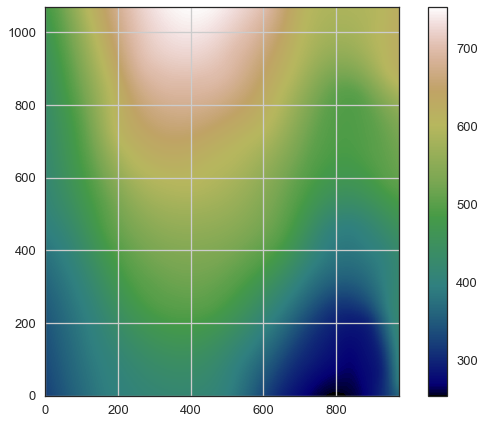

In [3]:
import matplotlib.pyplot as plt

im = plt.imshow(raster.read(1), cmap='gist_earth',extent = [0, 972, 0, 1069])
plt.grid()
plt.colorbar(im)

## Sampling from Array

The function ``gg.raster.sample_from_array(..)`` will be used to sample a single point or given lists/arrays of coordinates from an array.

Sampling from one given point. 

In [4]:
sample = gg.raster.sample_from_array(array = raster.read(1),
                                     extent = [0, 972, 0, 1069],
                                     point_x = 500,
                                     point_y = 500)

sample

562.0227

Sampling from given lists of x and y coordinates.

In [5]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

sample = gg.raster.sample_from_array(array = raster.read(1),
                                     extent = [0, 972, 0, 1069],
                                     point_x = point_x,
                                     point_y = point_y)

sample

array([378.79877, 435.21704, 505.29126, 541.74146, 562.0227 ],
      dtype=float32)

Sampling from given arrays of x and y coordinates.

In [6]:
point_x = np.array([100, 200, 300, 400 ,500.])
point_y = np.array([100, 200, 300, 400 ,500.])

sample = gg.raster.sample_from_array(array = raster.read(1),
                                     extent = [0, 972, 0, 1069],
                                     point_x = point_x,
                                     point_y = point_y)

sample

array([378.79877, 435.21704, 505.29126, 541.74146, 562.0227 ],
      dtype=float32)

## Sampling from Raster

The function ``gg.raster.sample_from_raster(..)`` will be used to sample a single point or given lists/arrays of coordinates from raster.

Sampling from one given point.

In [7]:
sample = gg.raster.sample_from_rasterio(raster = raster,
                                        point_x = 500,
                                        point_y = 500)

sample

561.646728515625

Sampling from given lists of x and y coordinates.

In [8]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

sample = gg.raster.sample_from_rasterio(raster = raster,
                                        point_x = point_x,
                                        point_y = point_y)

sample

[376.72430419921875,
 435.217041015625,
 505.291259765625,
 540.6767578125,
 561.646728515625]

Sampling from given arrays of x and y coordinates.

In [9]:
point_x = np.array([100, 200, 300, 400 ,500.])
point_y = np.array([100, 200, 300, 400 ,500.])

sample = gg.raster.sample_from_array(array = raster.read(1),
                                     extent = [0, 972, 0, 1069],
                                     point_x = point_x,
                                     point_y = point_y)

sample

array([378.79877, 435.21704, 505.29126, 541.74146, 562.0227 ],
      dtype=float32)

## Sample Randomly from Raster

The function ``gg.raster.sample_randomly(..)`` will be used to sample one or multiple points from an array or a raster.

Sample one point randomly from raster.

In [10]:
sample = gg.raster.sample_randomly(raster=raster,
                                   n=1)

sample

(499.5975036621094, [958.9328279390473, 575.8106536666121])

Sample multiple points randomly from raster.

In [11]:
sample = gg.raster.sample_randomly(raster=raster,
                                   n=5)

sample

([476.49139404296875,
  281.43865966796875,
  517.0643310546875,
  390.32611083984375,
  499.3290100097656],
 [array([ 52.73800673, 801.10830893, 830.06208878, 790.58638702,
         891.92781744]),
  array([821.18020375, 133.28813457, 864.26801061, 410.60125434,
         709.23305177])])

## Sample Randomly from Array
Sample one point randomly from array.

In [12]:
sample = gg.raster.sample_randomly(raster=raster.read(1),
                                   n=1,
                                   extent=[0, 972, 0, 1069])

sample

(496.9873046875, [461.2103603443257, 251.96520723262017])

Sample multiple points randomly from array.

In [13]:
sample = gg.raster.sample_randomly(raster=raster.read(1),
                                   n=5,
                                   extent=[0, 972, 0, 1069])

sample

([392.0314636230469,
  499.52685546875,
  663.1663818359375,
  423.22515869140625,
  575.964599609375],
 [array([117.09253163, 890.18766342, 229.87479638, 308.63301697,
         554.68993669]),
  array([163.14050659, 711.33012194, 882.20182061,  41.29593031,
         611.37383111])])